# Statistical Analysis: Handling Outliers





<img src="here.png" width="500"/>


In [1]:
#Importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing cell measureemnts dataframe
df = pd.read_csv("cells.csv",  index_col="Cell ID")
df.head()

,Diameter (micrometer)
Cell ID,
Cell 1,5.8
Cell 2,5.5
Cell 3,5.3
Cell 4,5.8
Cell 5,5.5


## Detecting outliers:
<img src="anot.png" width="500"/>
<img src="box.png" width="500"/>

###  Z-score method 


In [3]:
#Calculate the mean
mean = df['Diameter (micrometer)'].mean()

#Calculate the Standard deviation
std =df['Diameter (micrometer)'].std()

# Calculate z-scores and asign them to a new column
df["Z-score"] = (df['Diameter (micrometer)']-mean)/std

# Find observations with a z-score greater than 3 or less than -3
df[(df["Z-score"]>3) | (df["Z-score"]<-3)]

,Diameter (micrometer),Z-score
Cell ID,,
Cell 46,12.4,5.368683


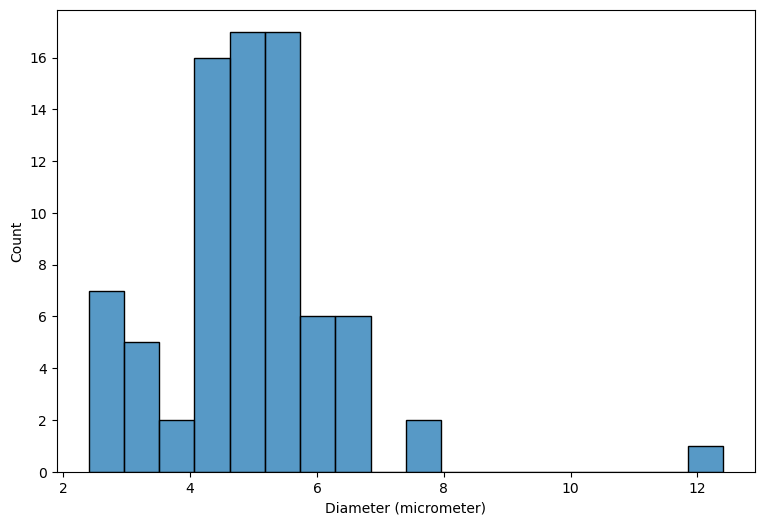

In [5]:
fig,ax = plt.subplots(figsize=(9,6))
# Plot histogram using Seaborn library to show distribution of dataset.
sns.histplot(x=df['Diameter (micrometer)'], data = df, ax=ax)
plt.savefig('Fig2_code.png', dpi=100)

### The Interquartile Range (IQR) method 


In [6]:
#  Calculate the first and third quartiles (Q1 and Q3) using the quantile method
q1 = df['Diameter (micrometer)'].quantile(q=0.25)
q3 = df['Diameter (micrometer)'].quantile(q=0.75)

# Calculate iqr (iqr = q3 - q1)
iqr = q3 - q1

#  Calculate the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers in column 'Diameter (micrometer)'
outliers = df[(df['Diameter (micrometer)'] < lower_bound) | (df['Diameter (micrometer)'] > upper_bound)]

# Print the outliers
print("Outliers in column 'Diameter (micrometer)':")
outliers.sort_values(by="Diameter (micrometer)")

Outliers in column 'Diameter (micrometer)':


,Diameter (micrometer),Z-score
Cell ID,,
Cell 78,7.4,1.787143
Cell 11,7.8,2.073666
Cell 46,12.4,5.368683


## Visualize outliers:


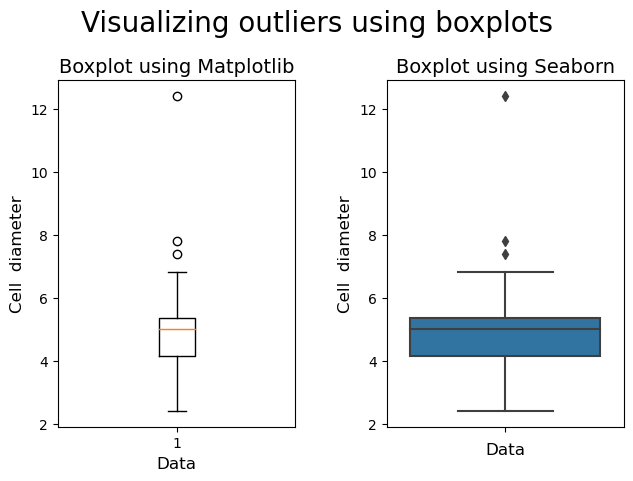

In [7]:
fig, [ax1,ax2] = plt.subplots( nrows=1, ncols=2, figsize=(7,5))

# Create a boxplot using Matplotlib
ax1.boxplot(df['Diameter (micrometer)'])
# Add labels and title
ax1.set_xlabel("Data", fontsize=12)
ax1.set_ylabel('Cell  diameter', fontsize=12)
ax1.set_title('Boxplot using Matplotlib', fontsize=14)

# Create a boxplot using Matplotlib
sns.boxplot(y=df['Diameter (micrometer)'],ax =ax2)

# Add labels and title
ax2.set_xlabel("Data", fontsize=12)
ax2.set_ylabel('Cell  diameter', fontsize=12)
ax2.set_title('Boxplot using Seaborn', fontsize=14)

# The plt.tight_layout() function is called to fit the plots within the figure cleanly.
# The pad parameter controls the padding between the subplots
plt.tight_layout(pad=3.1)


fig.suptitle("Visualizing outliers using boxplots", fontsize=20, y=1.01) 
plt.savefig('Fig2.png', dpi=300)

# Treating outliers:
## Capping outliers:
 

Original dataset size: (79, 2)
Capped dataset size: (79, 2)


Text(0.5, 1.0, 'Box plot  from capped Dataset')

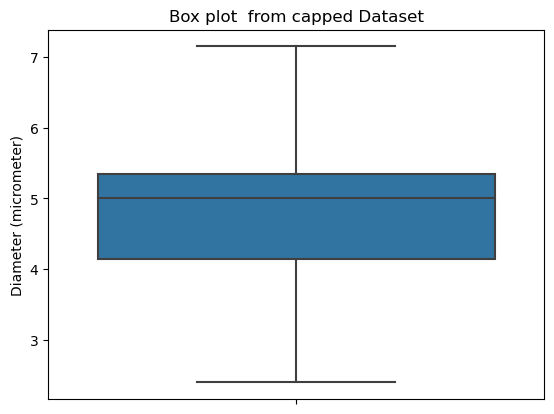

In [8]:
# Replace outliers with upper or lower bound previously found
df_capped =df.copy()
df_capped['Diameter (micrometer)'] = np.where(df_capped['Diameter (micrometer)']>upper_bound, upper_bound,
            np.where(df_capped['Diameter (micrometer)']<lower_bound, lower_bound,df_capped['Diameter (micrometer)'] ))
# Create a boxplot using Matplotlib
sns.boxplot(y=df_capped['Diameter (micrometer)'])
plt.savefig('Fig6.png', dpi=300)
print('Original dataset size:', df.shape)
print('Capped dataset size:', df_capped.shape)
plt.title("Box plot  from capped Dataset")

## Trimming outliers: 


Original dataset size: (79, 1)
Trimmed dataset size: (76, 1)


Text(0.5, 1.0, 'Box plot  from trimmed Dataset')

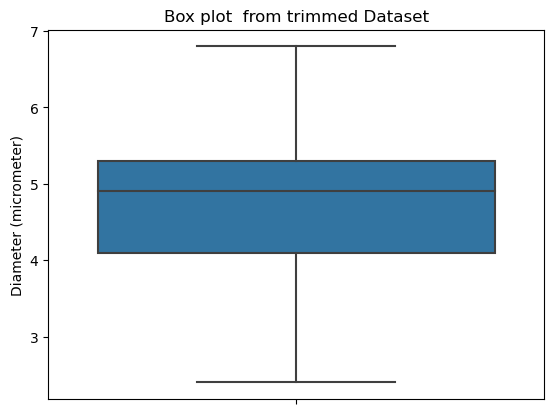

In [9]:
#Importing cell measureemnts dataframe
df = pd.read_csv("cells.csv",  index_col="Cell ID")

# Calculate the first and third quartiles (Q1 and Q3) using the quantile method
q1 = df['Diameter (micrometer)'].quantile(q=0.25)
q3 = df['Diameter (micrometer)'].quantile(q=0.75)

# Calculate iqr (iqr = q3 - q1)
iqr = q3 - q1

# Calculate the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Trim outliers by removing rows where the value in the 'Diameter (micrometer)' column is less than the lower bound or greater than the upper bound
df_trimmed = df[(df['Diameter (micrometer)'] >= lower_bound) & (df['Diameter (micrometer)'] <= upper_bound)]

# Print the original and trimmed dataset sizes
print('Original dataset size:', df.shape)
print('Trimmed dataset size:', df_trimmed.shape)

sns.boxplot(y=df_trimmed['Diameter (micrometer)'])
plt.title("Box plot  from trimmed Dataset")

# Role of outliers is different for different problem statements



<img src="age.png" width="500"/>



<img src="sal.png" width="500"/>
